https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download

**Introduction:**

Drawing from my own experience in companies that manage their own marketplaces I decided to look at the data set from 2 angles - Seller side and Customer(buyer) side
I used Python with Jupyter Notebook and imported Pandas, Numpy and other libraries to help with the formatting and visualization

The data set covers 773 days or almost 26 months as the period.

**Insight #1: Sellers Side**

I identified 3095 sellers and decided to look at their distributions by sales, category, and State(geography).

By sales:
To analyze this, I joined the orders table with the order_itmes table. My main idea was to see if there was a clear segmentation or tiers in the sellers group. 
The Average Revenue per Seller graph summarizes the seller’s distribution, very few sellers have a very high revenue. The same skewedness can be seen in the Seller’s Order Count graph and Seller’s overall Revenue.  There was no Tier segmentation that could be easily identified.

By Category:
Here I joined orders, order_itmes products table and the category_tranlations table.
By calculating the Average Revenue per Category I found that Computers has revenues over 5 times than most of the other categories. But by looking at the overall revenue by category the top 5 categories dwarf over the rest where Health and Beauty is the top most. And Computers category is not even near the top.

Just to be certain about this pattern I wanted to see how the sellers are spread over all the categories, this can be seen in the Seller’s per category graph. Here I find that most Sellers are found in Health and Beauty, sports and leisure and houseware categories. And furthermore, I found that a seller is more likely to be focused on a single category rather than be spread over several.


By State:
 I found the top selling categories per state, Health and Beauty is still the most popular.
Conclusion: Sellers are not tiered, the marketplace is skewed toward big sellers, sellers focus on specific categories.


**Conclusion:**
Sellers are not tiered, the marketplace is skewed toward big sellers, sellers focus on specific categories.


**Insight#2: Customer(buyer) side**

My idea was to understand the quantity and location of the demand and see how it behaved within the period of the dataset.
From the Customers table I found out that Sao Pablo and Rio de Janeiro with their corresponding States have the bulk of buyers.

Then I calculated the Monthly Average Users and Daily Average Users. From the MAU we can see how the number of buyers rises and then stabilizes somewhat. This means that there is a steady stream of new buyers. From the DAU graph we see a slow but significant rise of daily buyers.

Next, I wanted to see if the same customers return to the site and order more. The customers were separated by monthly cohorts and then I calculated the retention rate. From the Retention Rate Heatmap a troublesome fact arrives, the site has a very low retention rate, this means that the marketplace is mostly reliable on new buyers.

**Conclusions:**
Buyers are concentrated geographically in Sao Pablo and Rio de Janeiro (cities and states), the marketplace has a healthy stream of new buyers, but it doesn’t succeed in retaining them.


**Insight#3: How Customers Pay**

Here I joined the Customer table with the Orders table and the Payments table.
The vast majority of transactions are paid by Credit Card followed by digital vouchers (boleto in Brazil is a digital voucher).

At around 50% of customers prefer to pay on 1 installment and most paid amounts are at about $70. With and average spending amount of $166 and a median at$108.

**Conclusions:** Considering that the marketplace relies on new buyers whom most likely spend in reasonable amounts and most likely will pay on 1 installments we can conclude that buyers are reliable.


**Final Conclusions:**

There is a lot of potential this marketplace, it grows at a steady rate(mau), buyers are reliable clients who pay mostly by credit card and sellers know how to align themselves with the cultural nuances of the Brazilian market – making health and beauty the category with the most revenue-. 

The data is very well curated, and it was impressive to find a very low relative quantity of products without a category. I would recommend further analysis into creating Tiers of sellers, which would convey reliability and experience with new and returning buyers.

As a growth strategy based on this dataset, I would recommend to expand the seller’s base and at the same time helping bottom sellers increase their market share. This would seem contradictory as the competition would rise, but in a digital marketplace a recommendation engine might help in lowering down the friction between sellers.
 
The low retention rate can be considered as symptom of a young marketplace which might be reliable on worth of mouth at some rate but with time marketing in general might help improve it.


## Load libraries

In [1410]:
# Loading all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats as st
import sidetable
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go 
from datetime import datetime as dt
import datetime
import datetime as dt

pd.set_option('max_colwidth', 0)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import math as mth
np.warnings.filterwarnings('ignore')

In [1411]:
#seaborn settings
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,6)})

## Load Datasets

In [1412]:
# Loading the data
try:
    customers_df = pd.read_csv('olist_customers_dataset.csv')
    customers_df.name = 'customers_df'
except :
    print("error loading olist_customers_dataset")
    
try:
    geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
    geolocation_df.name = 'geolocation_df'
except :
    print("error loading olist_geolocation_dataset")
    

try:
    order_itmes_df = pd.read_csv('olist_order_items_dataset.csv')
    order_itmes_df.name = 'order_itmes_df'
except :
    print("error loading olist_order_items_dataset")

try:
    order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
    order_payments_df.name = 'order_payments_df'
except :
    print("error loading olist_order_payments_dataset")

try:
    order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
    order_reviews_df.name = 'order_reviews_df'
except :
    print("error loading olist_order_reviews_dataset")
    
try:
    orders_df = pd.read_csv('olist_orders_dataset.csv')
    orders_df.name = 'orders_df'
except :
    print("error loading olist_orders_dataset")

try:
    products_df = pd.read_csv('olist_products_dataset.csv')
    products_df.name = 'products_df'
except :
    print("error loading olist_products_dataset")
    

try:
    sellers_df = pd.read_csv('olist_sellers_dataset.csv')
    sellers_df.name = 'sellers_df'
except :
    print("error loading olist_sellers_dataset")
    
try:
    category_translation_df = pd.read_csv('product_category_name_translation.csv')
    category_translation_df.name = 'category_translation_df'
except :
    print("error loading product_category_name_translation")

In [1413]:
tables_names = ['customers_df','geolocation_df','order_itmes_df','order_payments_df','order_reviews_df','orders_df','products_df','sellers_df','category_translation_df']

In [1414]:
tables = [customers_df,geolocation_df,order_itmes_df,order_payments_df,order_reviews_df,orders_df,products_df,sellers_df,category_translation_df]

In [1415]:
tables_names[1]

'geolocation_df'

## Checking data types

In [1416]:
for t in tables:
    print(t.name)
    t.info()
    print('\n')

customers_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


geolocation_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city 

## Assigning date times to orders_df, order_itmes_df, order_reviews_df

In [1417]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [1418]:
#orders_df
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at']  = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date']  = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date']  = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date']  = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [1419]:
order_itmes_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [1420]:
# order_itmes_df
order_itmes_df['shipping_limit_date'] = pd.to_datetime(order_itmes_df['shipping_limit_date'])

In [1421]:
#order_reviews_df
order_reviews_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [1422]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

## Check missing data

In [1423]:
for t in tables:
    print(t.name)
    t.stb.missing()
    print('\n')

customers_df


,missing,total,percent
customer_id,0,99441,0.0
customer_unique_id,0,99441,0.0
customer_zip_code_prefix,0,99441,0.0
customer_city,0,99441,0.0
customer_state,0,99441,0.0




geolocation_df


,missing,total,percent
geolocation_zip_code_prefix,0,1000163,0.0
geolocation_lat,0,1000163,0.0
geolocation_lng,0,1000163,0.0
geolocation_city,0,1000163,0.0
geolocation_state,0,1000163,0.0




order_itmes_df


,missing,total,percent
order_id,0,112650,0.0
order_item_id,0,112650,0.0
product_id,0,112650,0.0
seller_id,0,112650,0.0
shipping_limit_date,0,112650,0.0
price,0,112650,0.0
freight_value,0,112650,0.0




order_payments_df


,missing,total,percent
order_id,0,103886,0.0
payment_sequential,0,103886,0.0
payment_type,0,103886,0.0
payment_installments,0,103886,0.0
payment_value,0,103886,0.0




order_reviews_df


,missing,total,percent
review_comment_title,87656,99224,88.341530
review_comment_message,58247,99224,58.702532
review_id,0,99224,0.000000
order_id,0,99224,0.000000
review_score,0,99224,0.000000
review_creation_date,0,99224,0.000000
review_answer_timestamp,0,99224,0.000000




orders_df


,missing,total,percent
order_delivered_customer_date,2965,99441,2.981668
order_delivered_carrier_date,1783,99441,1.793023
order_approved_at,160,99441,0.160899
order_id,0,99441,0.000000
customer_id,0,99441,0.000000
order_status,0,99441,0.000000
order_purchase_timestamp,0,99441,0.000000
order_estimated_delivery_date,0,99441,0.000000




products_df


,missing,total,percent
product_category_name,610,32951,1.851234
product_name_lenght,610,32951,1.851234
product_description_lenght,610,32951,1.851234
product_photos_qty,610,32951,1.851234
product_weight_g,2,32951,0.006070
product_length_cm,2,32951,0.006070
product_height_cm,2,32951,0.006070
product_width_cm,2,32951,0.006070
product_id,0,32951,0.000000




sellers_df


,missing,total,percent
seller_id,0,3095,0.0
seller_zip_code_prefix,0,3095,0.0
seller_city,0,3095,0.0
seller_state,0,3095,0.0




category_translation_df


,missing,total,percent
product_category_name,0,71,0.0
product_category_name_english,0,71,0.0


## Missing data research

In [1424]:
# order_reviews_df , orders_df, products_df
order_reviews_df.stb.missing()
order_reviews_df.head()

,missing,total,percent
review_comment_title,87656,99224,88.341530
review_comment_message,58247,99224,58.702532
review_id,0,99224,0.000000
order_id,0,99224,0.000000
review_score,0,99224,0.000000
review_creation_date,0,99224,0.000000
review_answer_timestamp,0,99224,0.000000


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01,2018-03-02 10:26:53


## people just dont like to leave reviews 
*******************************************

In [1425]:
# orders_df 
orders_df.stb.missing()
orders_df.head()

,missing,total,percent
order_delivered_customer_date,2965,99441,2.981668
order_delivered_carrier_date,1783,99441,1.793023
order_approved_at,160,99441,0.160899
order_id,0,99441,0.000000
customer_id,0,99441,0.000000
order_status,0,99441,0.000000
order_purchase_timestamp,0,99441,0.000000
order_estimated_delivery_date,0,99441,0.000000


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [1426]:
orders_df['order_status'].value_counts()

delivered      96478
shipped        1107 
canceled       625  
unavailable    609  
invoiced       314  
processing     301  
created        5    
approved       2    
Name: order_status, dtype: int64

In [1427]:
orders_df[orders_df['order_status'] == 'delivered'].stb.missing()
# from the delivered orders , less tha 1.5% rows are missing

,missing,total,percent
order_approved_at,14,96478,0.014511
order_delivered_customer_date,8,96478,0.008292
order_delivered_carrier_date,2,96478,0.002073
order_id,0,96478,0.000000
customer_id,0,96478,0.000000
order_status,0,96478,0.000000
order_purchase_timestamp,0,96478,0.000000
order_estimated_delivery_date,0,96478,0.000000


In [1428]:
orders_df[orders_df['order_status'] == 'shipped'].stb.missing()
# this makes sense since the order has not been delivered to the customer

,missing,total,percent
order_delivered_customer_date,1107,1107,100.0
order_id,0,1107,0.0
customer_id,0,1107,0.0
order_status,0,1107,0.0
order_purchase_timestamp,0,1107,0.0
order_approved_at,0,1107,0.0
order_delivered_carrier_date,0,1107,0.0
order_estimated_delivery_date,0,1107,0.0


In [1429]:
# lets check the missing delievered
missing_orders = orders_df[orders_df['order_delivered_customer_date'].isna()]
missing_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2965 entries, 6 to 99415
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       2965 non-null   object        
 1   customer_id                    2965 non-null   object        
 2   order_status                   2965 non-null   object        
 3   order_purchase_timestamp       2965 non-null   datetime64[ns]
 4   order_approved_at              2819 non-null   datetime64[ns]
 5   order_delivered_carrier_date   1183 non-null   datetime64[ns]
 6   order_delivered_customer_date  0 non-null      datetime64[ns]
 7   order_estimated_delivery_date  2965 non-null   datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 208.5+ KB


In [1430]:
missing_orders.order_status.value_counts()

shipped        1107
canceled       619 
unavailable    609 
invoiced       314 
processing     301 
delivered      8   
created        5   
approved       2   
Name: order_status, dtype: int64

In [1431]:
# total_missing - canceled - unavailable -invoiced - processing -delivered - approved
2965 -1107 -619 -609 -301 - 314 - 8 - 5 -2

0

## This confirms that  the missing deliveries add up to all those shipments that are canceled,unavailable, invoiced..etc. And the data is well curated.
*******************************************************************************************

In [1432]:
# products_df
products_df.stb.missing()
products_df.head(2)

,missing,total,percent
product_category_name,610,32951,1.851234
product_name_lenght,610,32951,1.851234
product_description_lenght,610,32951,1.851234
product_photos_qty,610,32951,1.851234
product_weight_g,2,32951,0.006070
product_length_cm,2,32951,0.006070
product_height_cm,2,32951,0.006070
product_width_cm,2,32951,0.006070
product_id,0,32951,0.000000


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [1433]:
# checking the missing category_names
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


## Its understandable that some products are very hard to drop into a definitive category
****************************************

### duplicates

In [1434]:
for t in tables: 
    print(t.name)
    t.duplicated().sum()
    print('\n')

customers_df


0



geolocation_df


261831



order_itmes_df


0



order_payments_df


0



order_reviews_df


0



orders_df


0



products_df


0



sellers_df


0



category_translation_df


0

## geolocation duplicates are a logical occurrance because many users might be using the same ip by geography
***********************************

#  EDA
* Range of dates that the data covers
* Sellers Analysis
    * Distributions : 
         * by sales
         * by category     
         * by state ( best selling categories by state)
    * Are Sellers specialized in selling specific categories
* Customers Analysis
    * Check unique buyers
    * Check buyer outliers 
* Payments Analysis       
  

# Range of dates that the data covers

In [1435]:
tables_names

['customers_df',
 'geolocation_df',
 'order_itmes_df',
 'order_payments_df',
 'order_reviews_df',
 'orders_df',
 'products_df',
 'sellers_df',
 'category_translation_df']

In [1436]:
orders_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [1437]:
start_date = orders_df['order_purchase_timestamp'].min().strftime('%Y-%m-%d')
start_date_ = pd.to_datetime(start_date)
start_date_

Timestamp('2016-09-04 00:00:00')

In [1438]:
end_date= orders_df['order_purchase_timestamp'].max().strftime('%Y-%m-%d')
end_date_ = pd.to_datetime(end_date)
end_date_

Timestamp('2018-10-17 00:00:00')

In [1439]:
(end_date_ - start_date_)

Timedelta('773 days 00:00:00')

In [1440]:
773 / 30

25.766666666666666

# Sellers Analysis   

In [1441]:
sellers_df.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [1442]:
order_itmes_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [1443]:
sellers_df['seller_id'].nunique()

3095

## Distributions : 
 * by sales
 * by category 
 * by state ( best selling categories by state)

### By sales

In [1444]:
#  i'll aggregate the number of delivered products and get the total per seller and order descending
order_itmes_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [1445]:
orders_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


### ***orders_df inner join  order_itmes_df on order_id***

In [1446]:
# orders_df inner join  order_itmes_df on order_id
orders_priced = orders_df.merge(order_itmes_df,on='order_id')

In [1447]:
# only look at the products that were delivered
orders_priced = orders_priced[~orders_priced['order_delivered_customer_date'].isna()]

In [1448]:
# group by seller and  sum price(this would be their revenue)
sellers_revenue = orders_priced.groupby(['seller_id'])['price'].sum().sort_values(ascending=False).reset_index()
sellers_revenue.head(10)

,seller_id,price
0,4869f7a5dfa277a7dca6462dcf3b52b2,226987.93
1,53243585a1d6dc2643021fd1853d8905,217940.44
2,4a3ca9315b744ce9f8e9374361493884,196882.12
3,fa1c13f2614d7b5c4749cbc52fecda94,190917.14
4,7c67e1448b00f6e969d365cea6b010ab,186570.05
5,7e93a43ef30c4f03f38b393420bc753a,165981.49
6,da8622b14eb17ae2831f4ac5b9dab84a,159816.87
7,7a67c85e85bb2ce8582c35f2203ad736,139658.69
8,1025f0e2d44d7041d6cf58b6550e0bfa,138208.56
9,955fee9216a65b617aa5c0531780ce60,131836.71


In [1449]:
sellers_revenue.query('price > 10000').count()

seller_id    282
price        282
dtype: int64

In [1450]:
sellers_stats = orders_priced.groupby(['seller_id']).agg({'price':['sum','mean','median','min', 'max','count']}).sort_values(by=('price','sum'),ascending=False).reset_index()

In [1451]:
#df.columns.set_levels(['b1','c1','f1'],level=1,inplace=True)
sellers_stats.columns.levels[0]

Index(['price', 'seller_id'], dtype='object')

In [1452]:
#rename multilevel columns
#sellers_stats.columns.set_levels(['revenue','seller_id'],level=0,inplace=True)

In [1453]:
sellers_stats.head()

seller_id      price                              \
                                           sum        mean  median     min   
0  4869f7a5dfa277a7dca6462dcf3b52b2  226987.93  197.724678  170.00  54.90    
1  53243585a1d6dc2643021fd1853d8905  217940.44  544.851100  283.20  170.00   
2  4a3ca9315b744ce9f8e9374361493884  196882.12  101.016993  89.90   12.90    
3  fa1c13f2614d7b5c4749cbc52fecda94  190917.14  329.735993  238.99  84.90    
4  7c67e1448b00f6e969d365cea6b010ab  186570.05  137.690074  139.94  29.99    

                  
       max count  
0  899.99   1148  
1  1649.99  400   
2  884.00   1949  
3  3999.90  579   
4  401.34   1355

In [1454]:
#sellers_stats['price']['mean']

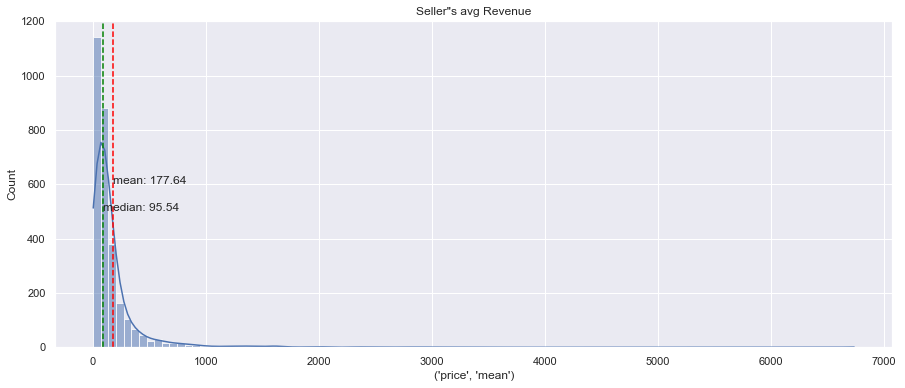

In [1455]:
sns.histplot(data=sellers_stats ,x=('price','mean'),bins=100,kde=True).set_title('Seller"s avg Revenue')

plt.axvline(sellers_stats['price']['mean'].mean(),color='red',linestyle='--');
plt.text(x = sellers_stats['price']['mean'].mean(),y = 600,s = 'mean: {:.2f}'.format(sellers_stats['price']['mean'].mean()))

plt.axvline(sellers_stats['price']['mean'].median(),color='green',linestyle='--')
plt.text(x = sellers_stats['price']['mean'].median(),y = 500,s = 'median: {:.2f}'.format(sellers_stats['price']['mean'].median()));
np.warnings.filterwarnings('ignore');

## ***Avg Revenue per Seller is $177.64***
------------------------------------

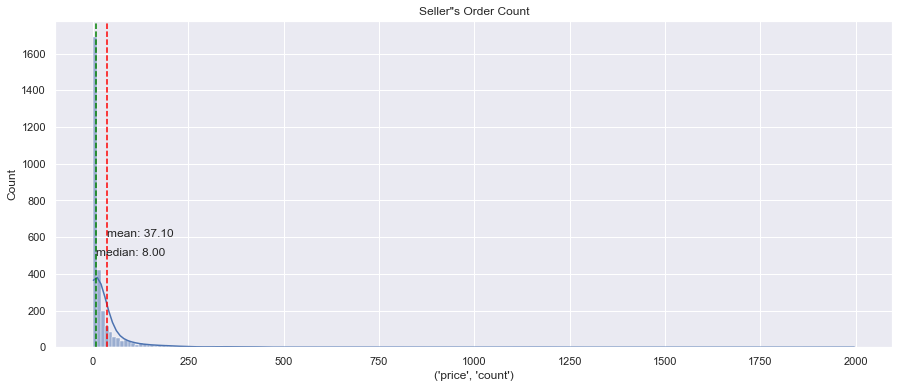

In [1456]:
sns.histplot(data=sellers_stats ,x=('price','count'),bins=200,kde=True).set_title('Seller"s Order Count')

plt.axvline(sellers_stats['price']['count'].mean(),color='red',linestyle='--');
plt.text(x = sellers_stats['price']['count'].mean(),y = 600,s = 'mean: {:.2f}'.format(sellers_stats['price']['count'].mean()))

plt.axvline(sellers_stats['price']['count'].median(),color='green',linestyle='--')
plt.text(x = sellers_stats['price']['count'].median(),y = 500,s = 'median: {:.2f}'.format(sellers_stats['price']['count'].median()));
np.warnings.filterwarnings('ignore');

## ***Avg Order Count per Seller is 37.10***

In [1457]:
#lets see the ranges of their revenues

In [1458]:
sellers_revenue['price'].min()

6.5

In [1459]:
sellers_revenue['price'].max()

226987.92999999813

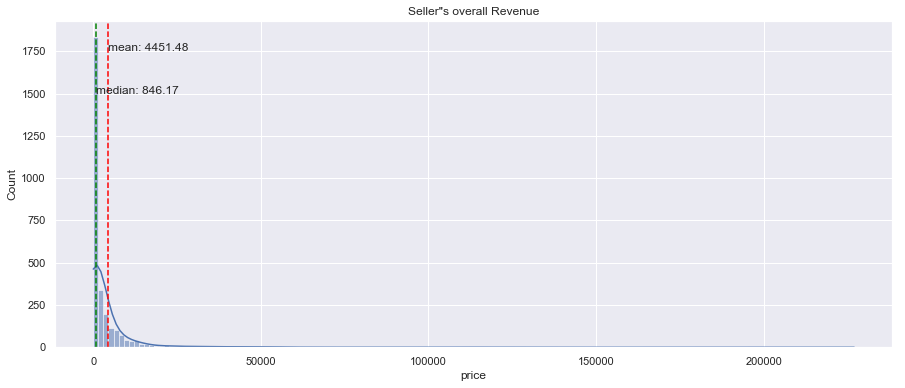

In [1460]:
sns.histplot(data=sellers_revenue ,x='price',bins=150,kde=True).set_title('Seller"s overall Revenue')

plt.axvline(sellers_revenue['price'].mean(),color='red',linestyle='--');
plt.text(x = sellers_revenue['price'].mean(),y = 1750,s = 'mean: {:.2f}'.format(sellers_revenue['price'].mean()))

plt.axvline(sellers_revenue['price'].median(),color='green',linestyle='--')
plt.text(x = sellers_revenue['price'].median(),y = 1500,s = 'median: {:.2f}'.format(sellers_revenue['price'].median()));
np.warnings.filterwarnings('ignore');


## ***A very skewed graph indicates that very few sellers have very high revenues***
------------------------------------------------------------------------

### By Category

#### Lets see which categories and products are the top selling and their ranges

In [1461]:
orders_priced.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value'],
      dtype='object')

In [1462]:
products_df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [1463]:
# orders_priced inner join products_df on product_id
orders_product_cat = orders_priced.merge(products_df,on='product_id')

In [1464]:
# orders_product_cat join category translation
orders_product_cat=orders_product_cat.merge(category_translation_df,on='product_category_name')

In [1465]:
#orders_product_cat.columns

In [1466]:
categories_revenue = orders_product_cat.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).reset_index()

In [1467]:
# orders_priced.groupby(['seller_id']).agg({'price':['sum','mean','median','min', 'max','count']}).sort_values(by=('price','sum'),ascending=False).reset_index()
categories_stats = (orders_product_cat.groupby('product_category_name_english')
                    .agg({'price':['sum','mean','median','min', 'max','count']})
                    .sort_values(by=('price','sum'),ascending=False)
                    .reset_index()
                   )

In [1468]:
categories_stats.head()

product_category_name_english       price                            \
                                        sum        mean  median   min   
0  health_beauty                 1233211.61  130.264245  79.90   1.20   
1  watches_gifts                 1165898.98  199.060779  128.90  8.99   
2  bed_bath_table                1023434.76  93.438762   79.05   6.99   
3  sports_leisure                954695.05   113.236277  77.90   4.50   
4  computers_accessories         888613.62   116.265029  81.99   3.90   

                   
       max  count  
0  3124.00  9467   
1  3999.90  5857   
2  1999.98  10953  
3  4059.00  8431   
4  3699.99  7643

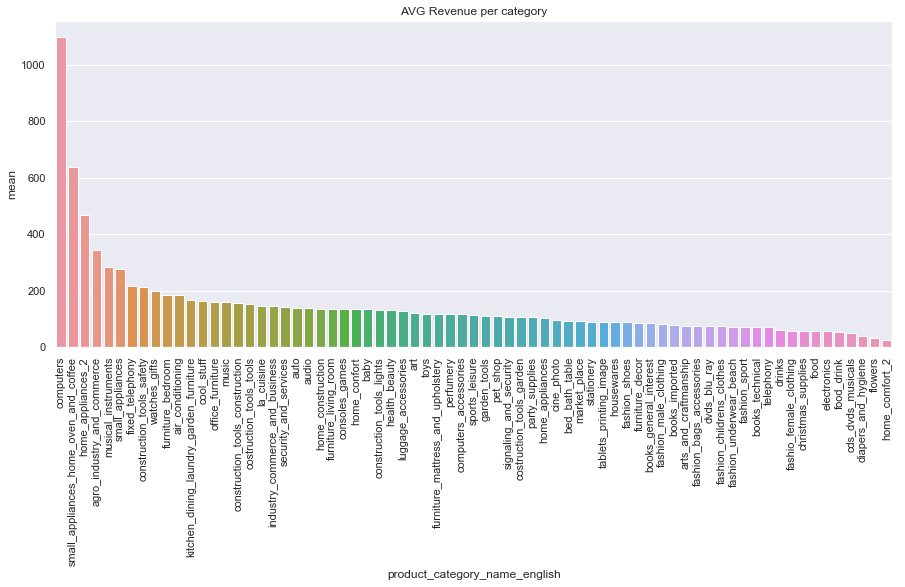

In [1469]:
g = sns.barplot(x="product_category_name_english",
                y=categories_stats['price']['mean'],
                data=categories_stats.sort_values(('price','mean'),ascending=False)).set_title('AVG Revenue per category')
plt.xticks(rotation=90);

In [1470]:
top_cate_by_avg_rev = categories_stats.sort_values(('price','mean'),ascending=False).head(7)

In [1471]:
top_7_by_avg_revenue = pd.DataFrame(top_cate_by_avg_rev[['product_category_name_english']])
top_7_by_avg_revenue['avg_revenue'] = top_cate_by_avg_rev['price']['mean']
top_7_by_avg_revenue

,product_category_name_english,avg_revenue
,,
16,computers,1098.915276
34,small_appliances_home_oven_and_coffee,638.213151
25,home_appliances_2,467.333117
28,agro_industry_and_commerce,342.553883
18,musical_instruments,283.127097
19,small_appliances,277.741824
31,fixed_telephony,216.922392


## ***By looking at the average revenue per category we found that computers is the top most category***
-------------------------------------------------------------

In [1472]:
# lets count orders by category
categories_stats.head()

product_category_name_english       price                            \
                                        sum        mean  median   min   
0  health_beauty                 1233211.61  130.264245  79.90   1.20   
1  watches_gifts                 1165898.98  199.060779  128.90  8.99   
2  bed_bath_table                1023434.76  93.438762   79.05   6.99   
3  sports_leisure                954695.05   113.236277  77.90   4.50   
4  computers_accessories         888613.62   116.265029  81.99   3.90   

                   
       max  count  
0  3124.00  9467   
1  3999.90  5857   
2  1999.98  10953  
3  4059.00  8431   
4  3699.99  7643

In [1473]:
#categories_stats['price']['count']

In [1474]:
cat_order_count = pd.DataFrame(categories_stats['product_category_name_english'])

In [1475]:
cat_order_count['order_count'] = categories_stats['price']['count']

In [1476]:
top7_by_order_count = cat_order_count.sort_values('order_count',ascending=False).head(7)

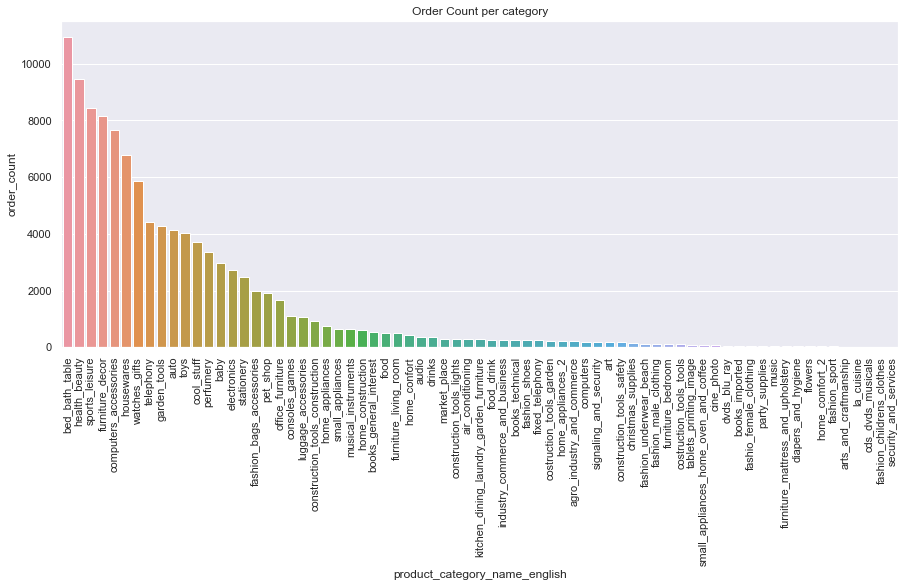

In [1477]:
g = sns.barplot(x="product_category_name_english",
                y='order_count',
                data=cat_order_count.sort_values('order_count',ascending=False)).set_title('Order Count per category')
plt.xticks(rotation=90);

In [1478]:
top7_by_order_count

,product_category_name_english,order_count
2,bed_bath_table,10953
0,health_beauty,9467
3,sports_leisure,8431
5,furniture_decor,8160
4,computers_accessories,7643
6,housewares,6795
1,watches_gifts,5857


## ***Here we find that 'bed_bath_table' is the category with the most orders***
------------------------------------------------------------------

#### lets calculate overall Revenue

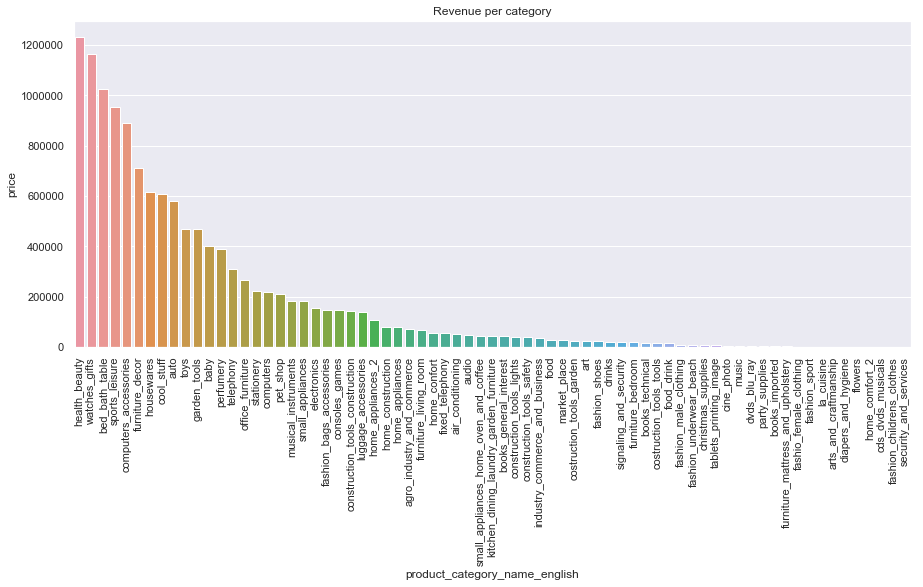

In [1479]:
g = sns.barplot(x="product_category_name_english", y="price", data=categories_revenue).set_title('Revenue per category')
plt.xticks(rotation=90);


In [1480]:
#top five categories 
top_five = categories_revenue.head()
top_five

,product_category_name_english,price
0,health_beauty,1233211.61
1,watches_gifts,1165898.98
2,bed_bath_table,1023434.76
3,sports_leisure,954695.05
4,computers_accessories,888613.62


## ***This is interesting, in Brazil 'health and beauty' are top issues with buyers, but as with the top sellers list -  a minority of categories bring the bulk of the revenue***
------------------------------------------------

### By State

#### Lets find the top categories per state (since products names are unavailable)

In [1481]:
#orders_product_cat.columns

In [1482]:
sellers_df.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [1483]:
# inner join orders_product_cat with sellers_df on seller_id
orders_region =  orders_product_cat.merge(sellers_df,on='seller_id')

In [1484]:
# lets get the english name , join with category_translation_df
orders_region = orders_region.merge(category_translation_df,on='product_category_name')

In [1485]:
#orders_region.columns

In [1486]:
region_stats = (orders_region.groupby(['seller_state','product_category_name_english_x'])
                    .agg({'price':['sum','mean','median','min', 'max','count']})
                    .sort_values(by=('price','sum'),ascending=False)
                    .reset_index()
                   )

In [1487]:
region_stats.head()

seller_state product_category_name_english_x      price                      \
                                                      sum        mean  median   
0  SP           watches_gifts                   940698.20  198.753053  136.00   
1  SP           bed_bath_table                  898137.09  92.792343   79.90    
2  SP           health_beauty                   683486.46  109.270417  65.89    
3  SP           sports_leisure                  586442.46  110.150725  74.99    
4  SP           furniture_decor                 488149.14  79.529022   59.90    

                        
    min      max count  
0  8.99  3999.90  4733  
1  6.99  1914.58  9679  
2  1.20  3124.00  6255  
3  5.49  4059.00  5324  
4  4.90  1699.99  6138

In [1488]:
orders_region_state = orders_region.groupby(['seller_state','product_category_name_english_x'])['price'].sum().sort_values(ascending=False).reset_index()

In [1489]:
orders_region_state = orders_region_state.rename(columns={'price':'revenue'})

In [1490]:
orders_region_state[orders_region_state['seller_state']=='SP'].head(1)

,seller_state,product_category_name_english_x,revenue
0,SP,watches_gifts,940698.2


In [1491]:
top_cat_per_state = orders_region_state.groupby('seller_state').head(1)
top_cat_per_state.head()

,seller_state,product_category_name_english_x,revenue
0,SP,watches_gifts,940698.20
14,PR,computers_accessories,199608.65
16,RJ,health_beauty,180010.38
19,BA,computers,167912.76
20,MG,computers_accessories,167896.83


In [1492]:
top_cat_per_state.product_category_name_english_x.value_counts()

health_beauty            5
computers_accessories    4
auto                     3
watches_gifts            2
sports_leisure           2
furniture_decor          1
perfumery                1
garden_tools             1
cool_stuff               1
telephony                1
computers                1
Name: product_category_name_english_x, dtype: int64

## ***Here we see how Health and Beauty  is top  in 5 states and this confirms how it is the top category also by geography***
-----------------------------------------------------------

## Are Sellers specialized in selling specific categories
To understand this question we need to group categories and see the seller distribution
* join order_items_df with products_df
* join with english category names

In [1493]:
sellers_products = order_itmes_df.merge(products_df,on='product_id')

In [1494]:
sellers_products = sellers_products.merge(category_translation_df,on='product_category_name')

In [1495]:
sellers_products.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [1496]:
category_sellers = sellers_products.groupby('product_category_name_english').agg({'seller_id':'nunique'}).reset_index()

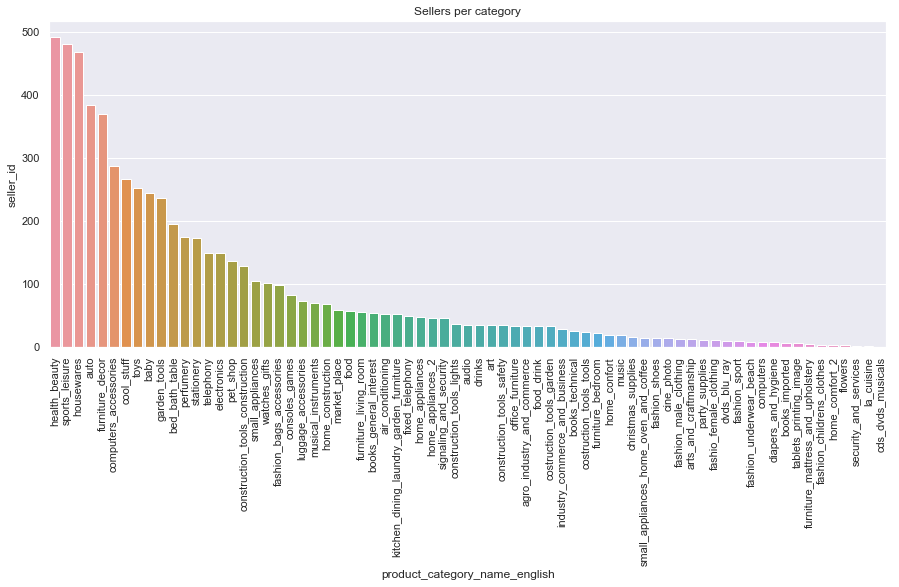

In [1497]:
g = sns.barplot(x="product_category_name_english",
                y="seller_id",
                data=category_sellers.sort_values('seller_id',ascending=False)).set_title('Sellers per category')
plt.xticks(rotation=90);

In [1498]:
category_sellers.sort_values('seller_id',ascending=False).head(7)

,product_category_name_english,seller_id
43,health_beauty,492
65,sports_leisure,481
49,housewares,468
5,auto,383
39,furniture_decor,370
15,computers_accessories,287
20,cool_stuff,267


## ***Here we see that health_beauty has the highest number of sellers***
----------------------------------------------------

#### Lets see how many products per category on avg do the sellers have

In [1499]:
sellers_category_stats = sellers_products.groupby('seller_id').agg({'product_category_name_english':'nunique',
                                                                   'product_id':'nunique'}).reset_index()

In [1500]:
sellers_category_stats['product_category_name_english'].mean()

2.094296076491922

In [1501]:
sellers_category_stats['product_category_name_english'].median()

1.0

## ***Most sellers are focused on one specific category***

In [1502]:
sellers_category_stats.head()

,seller_id,product_category_name_english,product_id
0,0015a82c2db000af6aaaf3ae2ecb0532,1,1
1,001cca7ae9ae17fb1caed9dfb1094831,2,11
2,001e6ad469a905060d959994f1b41e4f,1,1
3,002100f778ceb8431b7a1020ff7ab48f,1,24
4,004c9cd9d87a3c30c522c48c4fc07416,1,79


In [1503]:
#lets check for nan and zeros since I want to products per category
sellers_category_stats.isna().sum()

seller_id                        0
product_category_name_english    0
product_id                       0
dtype: int64

In [1504]:
sellers_category_stats['products_per_category'] = sellers_category_stats['product_id']/sellers_category_stats['product_category_name_english']

In [1505]:
sellers_category_stats.head()

,seller_id,product_category_name_english,product_id,products_per_category
0,0015a82c2db000af6aaaf3ae2ecb0532,1,1,1.0
1,001cca7ae9ae17fb1caed9dfb1094831,2,11,5.5
2,001e6ad469a905060d959994f1b41e4f,1,1,1.0
3,002100f778ceb8431b7a1020ff7ab48f,1,24,24.0
4,004c9cd9d87a3c30c522c48c4fc07416,1,79,79.0


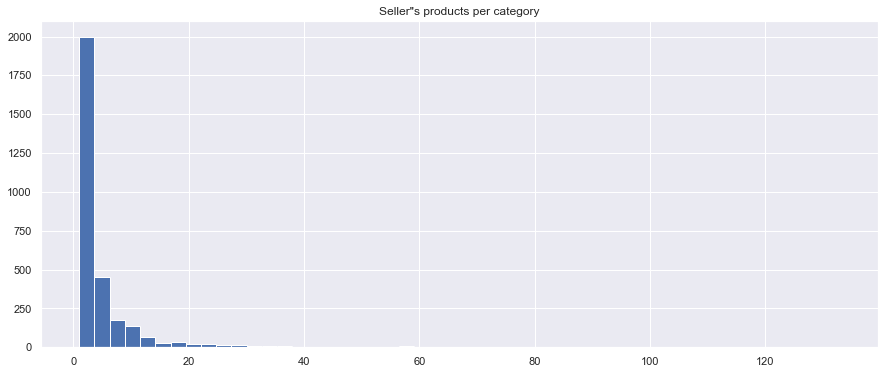

In [1506]:
sellers_category_stats['products_per_category'].hist(bins=50).set_title('Seller"s products per category');

In [1507]:
sellers_category_stats['products_per_category'].mean()

5.121946895285845

In [1508]:
sellers_category_stats['products_per_category'].median()

2.0

## ***We could say that sellers dont over reach and try to focus on a few categories***
************************************************************************************

# Customers Analysis
* Where are they from?
    * customers per state
    * customers per city
* When are they ordering? is there a seosanilty
* Do they keep buying? 
    * MAU
    * DAU
    * Retention Rate
* How much are they spending? and how?(credit card, other)

In [1509]:
tables_names

['customers_df',
 'geolocation_df',
 'order_itmes_df',
 'order_payments_df',
 'order_reviews_df',
 'orders_df',
 'products_df',
 'sellers_df',
 'category_translation_df']

In [1510]:
customers_df.head(1)
orders_df.head(1)
order_payments_df.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


## Where are they from, customers per city, per state

In [1511]:
customers_per_city = customers_df.groupby('customer_city').agg({'customer_unique_id':'nunique'}).reset_index()

In [1512]:
#top 10 citys
customers_per_city.sort_values('customer_unique_id',ascending=False).head(10)

,customer_city,customer_unique_id
3597,sao paulo,14984
3155,rio de janeiro,6620
453,belo horizonte,2672
558,brasilia,2069
1143,curitiba,1465
707,campinas,1398
2964,porto alegre,1326
3247,salvador,1209
1529,guarulhos,1153
3428,sao bernardo do campo,908


In [1513]:
customers_per_state = customers_df.groupby('customer_state').agg({'customer_unique_id':'nunique'}).reset_index()

In [1514]:
#top 10 states
customers_per_state.sort_values('customer_unique_id',ascending=False).head(10)

,customer_state,customer_unique_id
25,SP,40302
18,RJ,12384
10,MG,11259
22,RS,5277
17,PR,4882
23,SC,3534
4,BA,3277
6,DF,2075
7,ES,1964
8,GO,1952


## ***Sao Pablo - the city and state have a disproportionate ammount of customers, this is a clue on the economic power of that geographic region***
---------------------------------------------------------

## When are they ordering? is there a seosanilty
* DAU, MAU

In [1515]:
customers_df.head(1)
orders_df.head(1)
order_payments_df.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [1516]:
#dAU -we''ll take all orders including those not delivered
all_orders = orders_df[['order_id','customer_id','order_purchase_timestamp']]
all_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 2.3+ MB


In [1517]:
all_orders['year'] = all_orders['order_purchase_timestamp'].dt.year

In [1518]:
all_orders['month'] = all_orders['order_purchase_timestamp'].dt.month

In [1519]:
all_orders['week'] = all_orders['order_purchase_timestamp'].dt.week

In [1520]:
all_orders['day'] = all_orders['order_purchase_timestamp'].dt.day

In [1521]:
all_orders['date'] = all_orders['order_purchase_timestamp'].dt.date

In [1522]:
#unique customers per year
custemers_per_year = all_orders.groupby('year')['customer_id'].nunique()

In [1523]:
#mau
monthly_visits =  all_orders.groupby(['year','month'])['customer_id'].nunique()
monthly_visits.head()

year  month
2016  9        4   
      10       324 
      12       1   
2017  1        800 
      2        1780
Name: customer_id, dtype: int64

In [1524]:
mau = int(monthly_visits.mean())
mau

3977

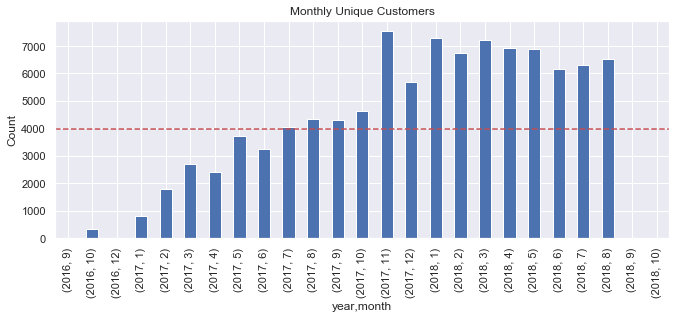

In [1525]:
plt.figure(figsize=(11, 4))
plt.title('Monthly Unique Customers')
plt.ylabel('Count')
ax = monthly_visits.plot.bar(grid=True)
plt.axhline(y=mau,color='r',ls='--')
plt.show();

In [1526]:
all_orders.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'year', 'month',
       'week', 'day', 'date'],
      dtype='object')

In [1527]:
#daily unique visitors
daily_visits_u = all_orders.groupby(['year','month','day'])['customer_id'].nunique()
daily_visits_u.head()

year  month  day
2016  9      4      1
             5      1
             13     1
             15     1
      10     2      1
Name: customer_id, dtype: int64

In [1528]:
dau = daily_visits_u.mean()
dau

156.84700315457414

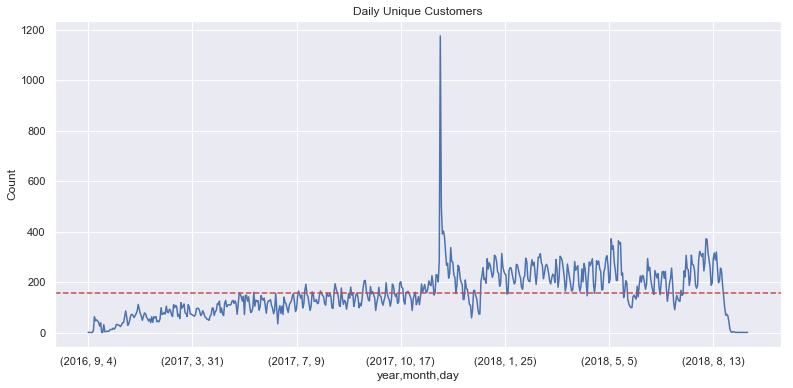

In [1529]:
plt.figure(figsize=(13, 6))
plt.title('Daily Unique Customers')
plt.ylabel('Count')
ax = daily_visits_u.plot.line(grid=True)
plt.axhline(y=dau,color='r',ls='--')
plt.show();

In [1530]:
max_Count =daily_visits_u.max()

In [1531]:
max_date = pd.DataFrame(daily_visits_u)
max_date.query('customer_id == @max_Count')


,,,customer_id
year,month,day,
2017,11,24,1176


### orders per customer

In [1532]:
#in customer_df - the same customer will get different ids for different orders
customers_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [1533]:
order_per_customer = customers_df.groupby('customer_unique_id').agg({'customer_id':'count'}).reset_index()
order_per_customer.head(2)

,customer_unique_id,customer_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1


In [1534]:
order_per_customer.query('customer_id >1').head(2)

,customer_unique_id,customer_id
33,00172711b30d52eea8b313a7f2cced02,2
106,004288347e5e88a27ded2bb23747066c,2


### Do customers return and keep buying?
join customers_df with all_orders on customer_id

In [1535]:
all_orders.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'year', 'month',
       'week', 'day', 'date'],
      dtype='object')

In [1536]:
customer_orders = all_orders.merge(customers_df,on='customer_id')

In [1537]:
customer_orders.head(2)

,order_id,customer_id,order_purchase_timestamp,year,month,week,day,date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017,10,40,2,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018,7,30,24,2018-07-24,af07308b275d755c9edb36a90c618231,47813,barreiras,BA


In [1538]:
# grouping by first visit all_orders
first_order_by_customer =  customer_orders.groupby('customer_unique_id')['order_purchase_timestamp'].min()

In [1539]:
#renaming the series
first_order_by_customer.name = 'first_visit_date'
first_order_by_customer.head(2)

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2   2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f   2018-05-07 11:11:27
Name: first_visit_date, dtype: datetime64[ns]

In [1540]:
#join with customer_orders
customer_orders = customer_orders.merge(first_order_by_customer,on='customer_unique_id')
customer_orders.head(1)

,order_id,customer_id,order_purchase_timestamp,year,month,week,day,date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,first_visit_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017,10,40,2,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-04 11:26:38


In [1541]:
# singleing out the months out 
customer_orders['first_order_month'] = customer_orders['first_visit_date'].astype('datetime64[M]')
customer_orders['order_month'] = customer_orders['order_purchase_timestamp'].astype('datetime64[M]')

In [1542]:
customer_orders.head(1)

,order_id,customer_id,order_purchase_timestamp,year,month,week,day,date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,first_visit_date,first_order_month,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017,10,40,2,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-04 11:26:38,2017-09-01,2017-10-01


In [1543]:
#cohort_grouped = orders.groupby('first_order_month').agg({'order_id': 'nunique', 'customer_id': 'nunique', 'revenue': 'sum'})
cohort_grouped = customer_orders.groupby('first_order_month').agg({'customer_unique_id':'nunique'})

### Calculating Retention Rate
To calculate retention we need to find the time differnce between any purchase and the first session

In [1544]:
#extracting the cohort age or lifetime
customer_orders['cohort_lifetime'] = (customer_orders['order_month'] - customer_orders['first_order_month'])/ np.timedelta64(1, 'M')

In [1545]:
customer_orders['cohort_lifetime'] = customer_orders['cohort_lifetime'].round().astype(int)

In [1546]:
#customer_orders['cohort_lifetime'].value_counts()

In [1547]:
cohorts = (
    customer_orders.groupby(['first_order_month', 'cohort_lifetime'])
    .agg({'customer_unique_id': 'nunique'})
    .reset_index()
)
cohorts.head(1)

,first_order_month,cohort_lifetime,customer_unique_id
0,2016-09-01,0,4


In [1548]:
initial_customers_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_order_month', 'customer_unique_id']]

In [1549]:
initial_customers_count = initial_customers_count.rename(columns={'customer_unique_id': 'cohort_users_count'})

In [1550]:
initial_customers_count.head(2)

,first_order_month,cohort_users_count
0,2016-09-01,4
1,2016-10-01,321


In [1551]:
cohorts = cohorts.merge(initial_customers_count, on='first_order_month')

In [1552]:
cohorts.head(2)

,first_order_month,cohort_lifetime,customer_unique_id,cohort_users_count
0,2016-09-01,0,4,4
1,2016-10-01,0,321,321


In [1553]:
cohorts['retention'] = (cohorts['customer_unique_id'] / cohorts['cohort_users_count'])

In [1554]:
cohorts['retention'].isna().sum()

0

In [1555]:
retention_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
).fillna(0)

In [1556]:
retention_pivot.index =retention_pivot.index.astype(str)

In [1557]:
#retention_pivot

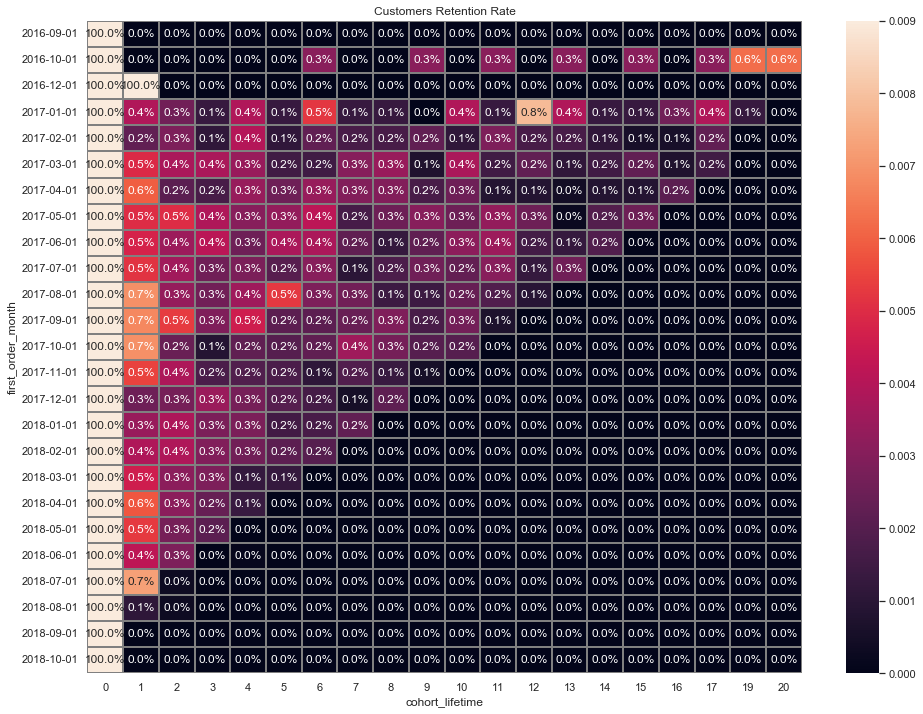

In [1558]:
plt.figure(figsize=(16, 12))
plt.title('Customers Retention Rate')
sns.heatmap(
    retention_pivot,
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='gray',
    vmin=0.0,vmax=0.009
    
) 
plt.show();

## ***The customer retention doesnt look very good, apperently the site relies on constant new buyers***

In [1559]:
tables_names

['customers_df',
 'geolocation_df',
 'order_itmes_df',
 'order_payments_df',
 'order_reviews_df',
 'orders_df',
 'products_df',
 'sellers_df',
 'category_translation_df']

# Payment Analysis
### How much are they spending? and how?(credit card, other)
we need to join customer_df with orders and the join with payments

In [1560]:
payments =  orders_df.merge(customers_df,on='customer_id')

In [1561]:
payments = payments.merge(order_payments_df,on='order_id')

In [1562]:
payments.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59


In [1563]:
payments_type = pd.DataFrame(payments['payment_type'].value_counts().reset_index())

In [1564]:
payments_type = payments_type.rename(columns={'index': 'type',
                                             'payment_type':'count'})

In [1565]:
payments_type['percentage'] = payments_type['count']/payments_type['count'].sum()

In [1566]:
payments_type

,type,count,percentage
0,credit_card,76795,0.739224
1,boleto,19784,0.190440
2,voucher,5775,0.055590
3,debit_card,1529,0.014718
4,not_defined,3,0.000029


In [1567]:
fig = px.pie(payments_type, values='count', names='type', title='payments_type')
fig.show()

In [1568]:
installments = pd.DataFrame(payments['payment_installments'].value_counts().reset_index())

In [1569]:
installments = installments.rename(columns={'index':'num_of_installments','payment_installments':'count'})

In [1570]:
installments.mean()

num_of_installments    11.708333  
count                  4328.583333
dtype: float64

In [1571]:
installments.median()

num_of_installments    11.5
count                  50.5
dtype: float64

In [1572]:
installments.head()

,num_of_installments,count
0,1,52546
1,2,12413
2,3,10461
3,4,7098
4,10,5328


In [1573]:
installments['percentage'] = installments['count']/installments['count'].sum()

In [1574]:
installments.head()

,num_of_installments,count,percentage
0,1,52546,0.505804
1,2,12413,0.119487
2,3,10461,0.100697
3,4,7098,0.068325
4,10,5328,0.051287


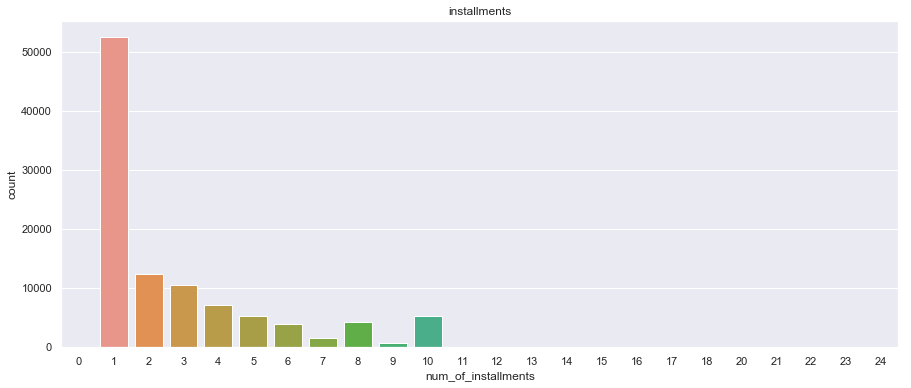

In [1575]:
g = sns.barplot(x="num_of_installments",
                y='count',
                data=installments).set_title('installments')


## at around 50% of buyers will decide on 1 installment

In [1576]:
## avG spending per unique costumer
payments.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [1577]:
payment_per_customer = payments.groupby('customer_unique_id').agg({'payment_value':'sum'}).reset_index()

In [1578]:
payment_per_customer.head()

,customer_unique_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [1579]:
avg_payment_per_user = payment_per_customer.payment_value.mean()
avg_payment_per_user

166.5942257141301

In [1580]:
median_payment_per_user = payment_per_customer.payment_value.median()
median_payment_per_user

108.0

In [1581]:
amounts = pd.DataFrame(payment_per_customer.payment_value.value_counts())


In [1582]:
amounts

,payment_value
77.57,241
35.00,162
73.34,149
116.94,126
65.00,112
...,...
155.06,1
373.90,1
263.02,1
91.64,1


In [1583]:
fig = px.histogram(amounts, x=amounts.index,  title='Payments amount distribution')
fig.show()

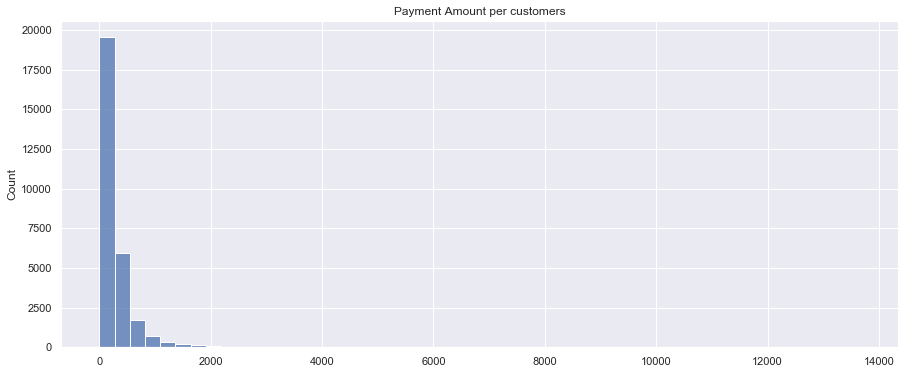

In [1584]:
sns.histplot(data=amounts, x=amounts.index, bins=50).set_title('Payment Amount per customers');

## ***Buyers are more likely to spend at around $70***